In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [ ]:
df=data.head(10)

Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

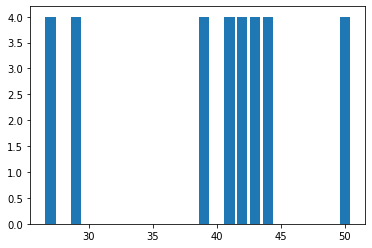

In [ ]:
plt.bar (df['Age'],4)

Bivariate Analysis

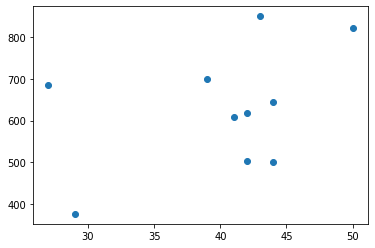

In [ ]:
plt.scatter(df['Age'],df['CreditScore'])

Multivariate analysis

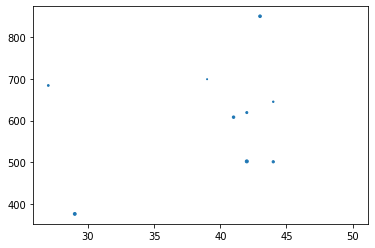

In [ ]:
plt.scatter(df['Age'],df['CreditScore'],df['Surname'])

 Perform descriptive statistics on the dataset

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Find the outliers and replace the outliers

Finding Outliners

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


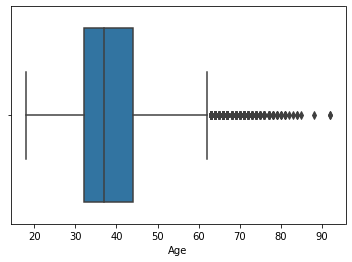

In [ ]:
sns.boxplot(data['Age'])

Removing outliners

In [ ]:
q=data.quantile(q=[0.75,0.5])

In [ ]:
iqr=q.iloc[0]-q.iloc[1]

In [ ]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
Surname              696.2500
CreditScore           66.0000
Geography              1.0000
Gender                 1.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)

In [ ]:
l['Age']

26.5

In [ ]:
u=q.iloc[1]+(1.5*iqr)

In [ ]:
u['Age']

47.5

In [ ]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


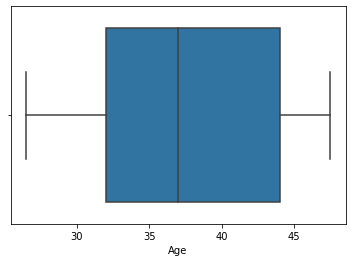

In [ ]:
sns.boxplot(data['Age'])

 Check for Categorical columns and perform encoding.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le=LabelEncoder()

In [ ]:
data['Surname']=le.fit_transform(data['Surname'])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data['Geography']=le.fit_transform(data['Geography'])

In [ ]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42,3,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables.

Independent Variables

In [ ]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42,3,75075.31,2,1,0,92888.52


Dependent Variables

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scale(x)


array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7525,7526,15770406,2775,580,1,0,35,9,121355.19,1,0,1,35671.45
4800,4801,15679810,453,690,0,0,39,6,0.00,2,1,0,160532.88
9736,9737,15644103,2790,659,2,0,78,2,151675.65,1,0,1,49978.67
7777,7778,15638730,1643,711,0,1,21,0,82844.33,2,0,1,1408.68
5167,5168,15587174,1394,726,0,0,29,7,0.00,2,1,1,91844.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,9667,15781689,1626,758,2,0,35,5,0.00,2,1,0,95009.60
7501,7502,15605341,143,681,0,1,58,8,93173.88,1,1,1,139761.25
9770,9771,15659327,1824,520,0,0,49,5,121197.64,1,1,0,72577.33
8056,8057,15736078,2607,730,1,1,33,7,130367.87,1,1,0,15142.10


In [ ]:
x_train.shape

(8000, 13)

In [ ]:
y_train

7525    0
4800    0
9736    0
7777    0
5167    1
       ..
9666    0
7501    0
9770    1
8056    1
3113    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3345,3346,15648320,1153,658,0,1,31,7,123974.96,1,1,0,102153.75
1135,1136,15656121,1778,733,1,0,31,6,157791.07,2,0,0,177994.81
5963,5964,15653521,2045,850,1,1,40,7,104449.80,1,1,1,747.88
1922,1923,15805637,1233,625,0,0,36,9,108546.16,3,1,0,133807.77
6385,6386,15706810,2931,606,1,1,32,1,106301.85,2,0,1,59061.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,5848,15569666,1017,517,0,1,45,4,0.00,1,0,0,172674.36
3891,3892,15748854,2551,723,1,1,28,5,91938.31,1,1,0,143481.85
458,459,15707362,2888,514,1,0,43,1,95556.31,1,0,1,199273.98
2781,2782,15641416,2411,732,1,1,61,9,94867.18,2,1,1,157527.60


In [ ]:
x_test.shape

(2000, 13)

In [ ]:
y_test

3345    0
1135    0
5963    0
1922    1
6385    0
       ..
5847    1
3891    0
458     1
2781    1
5165    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
y_test.shape

(2000,)